In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
# Load and overview the dataset
df = pd.read_csv('./data/hotel_revenue_edited.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Transient,82.0,0,1,Canceled
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,15,0,Transient,105.5,0,0,Canceled
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Transient,123.0,0,0,Canceled
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Transient,107.0,0,2,Canceled
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,0,0,BB,PRT,Direct,Direct,0,0,0,0,No Deposit,No Agent,0,Transient,108.3,0,2,Canceled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141497 entries, 0 to 141496
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           141497 non-null  object 
 1   is_canceled                     141497 non-null  int64  
 2   lead_time                       141497 non-null  int64  
 3   arrival_date_year               141497 non-null  int64  
 4   arrival_date_month              141497 non-null  object 
 5   arrival_date_week_number        141497 non-null  int64  
 6   arrival_date_day_of_month       141497 non-null  int64  
 7   stays_in_weekend_nights         141497 non-null  int64  
 8   stays_in_week_nights            141497 non-null  int64  
 9   adults                          141497 non-null  int64  
 10  children                        141497 non-null  int64  
 11  babies                          141497 non-null  int64  
 12  meal            

# EDA + Visualization

### Which hotel has higher bookings cancellation rate?

In [4]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df[df['is_canceled'] == 1]
cancel_group = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_group.size()).rename(columns = {0:'total_cancelled_bookings'})

In [5]:
# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

In [6]:
# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,38995,92673,42.08
Resort Hotel,13727,48824,28.12


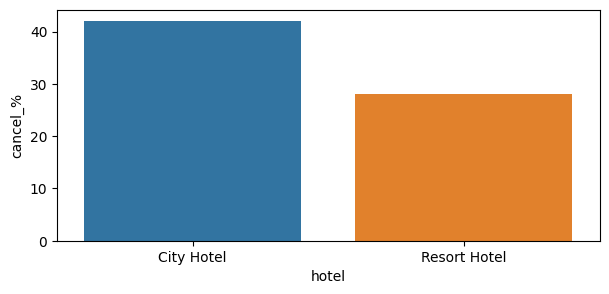

In [17]:
plt.figure(figsize = (7,3))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show();

City Hotel's cancell is more than 42% and much higher than the cancellation rate of Resort Hotel.

### Distribution of nights spent at hotels by market segment and hotel type

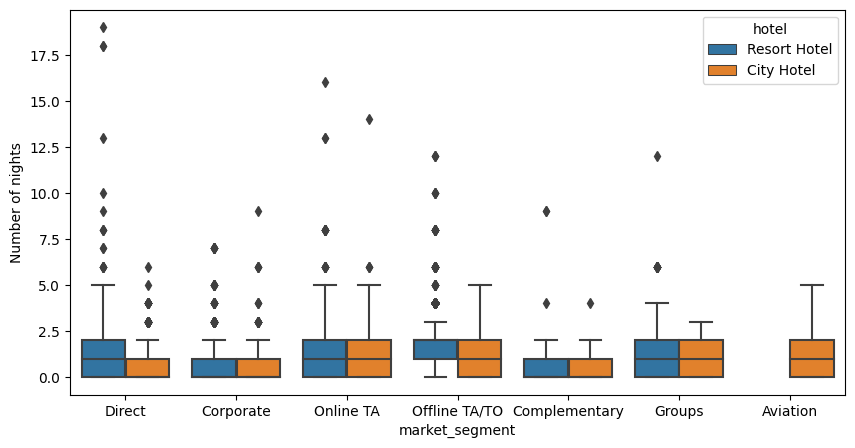

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['is_canceled'] == 0],x='market_segment',y='stays_in_weekend_nights',hue='hotel')
plt.ylabel('Number of nights')
plt.show()

Most people don't seem to prefer to stay at the hotel more than one week

### Have any relationships between special requests and cancellation?

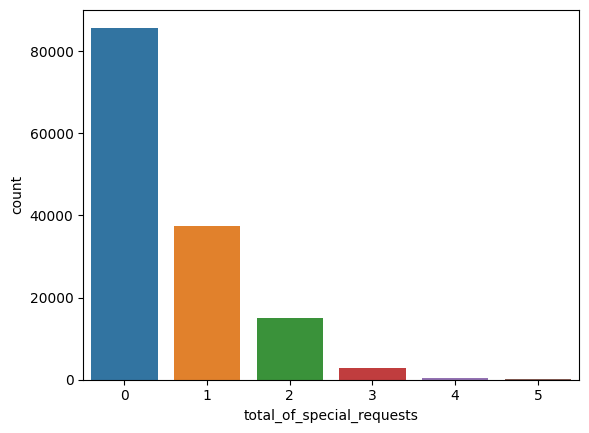

In [9]:
sns.countplot(x=df.total_of_special_requests);  

In [10]:
per = len(df[df['total_of_special_requests'] == 0]) * 100 / len(df)
per

60.642981830003464

It seems this was alomost 61% of the reservations don't have any special requests

### Correlation between is_canceled and the numerical data 

Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we won't need to check them for correlation.

We remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns and add total_nights and total_people columns. We check the correlation between is_cancel and the rest of the data.

In [13]:
# Adding total staying days in hotels
df['total_nights'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df['total_people'] = df['adults']+df['children']+df['babies']

In [14]:
df1 = df[['is_canceled', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'total_nights', 'total_people']]

C:\Users\biauser\AppData\Local\Temp\ipykernel_13472\3653578525.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True, square=True);


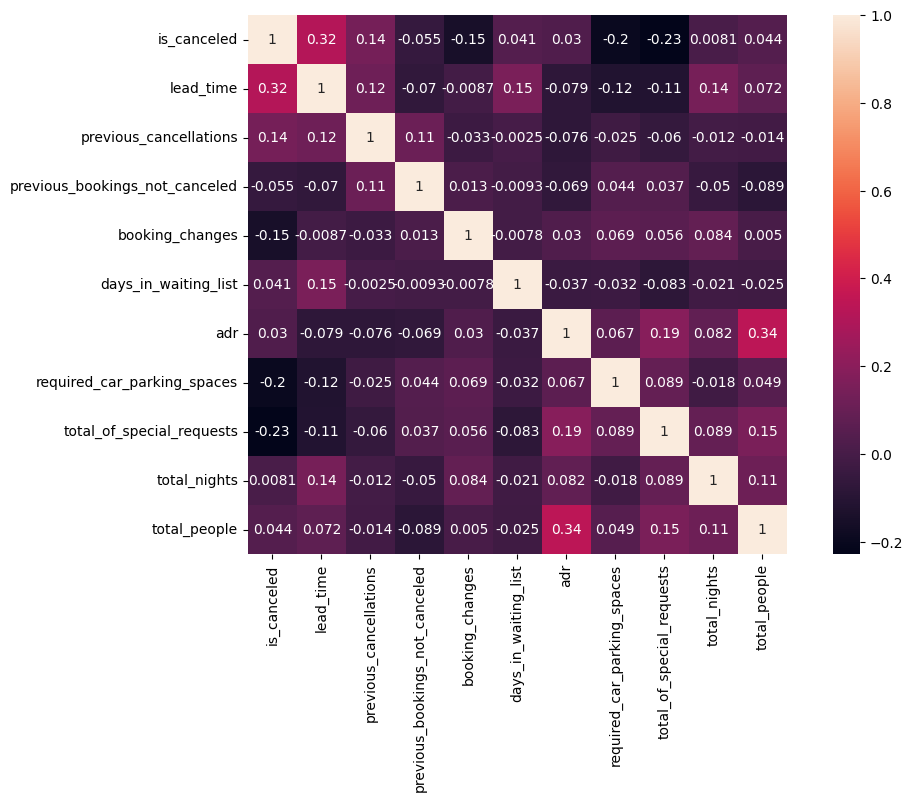

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(df1.corr(),annot=True, square=True);

is_canceled and lead time have slight correlation. This may means if the number of booking days is a long period of time compared to the number of check-in days, the customer may cancel the reservation. 

adr is slightly correlated with total_people, which makes sense as more number of people means more revenue (adr = average daily rate).

lead_time = the period of time (most typically measured in calendar days) between when a guest makes the reservation and the actual check-in/arrival date. 